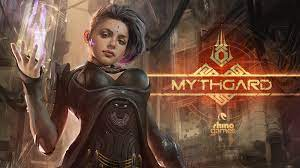</img>

# Mythgard Deck Builder Helper

## Find the playability of your cards in multi-color decks

First export your deck and put it in between the triple quotes. Then follow the instructions for actual gem cost, card draw and burn rate. Finally go to Runtime and hit Run All.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [16]:
#@title
import numpy as np
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
pd.options.display.float_format = '{:.1%}'.format

In [17]:
#Put deck between triple quotes. 
deck = """
name: Copy of BOP
coverart: The Long Winter
path: turn of seasons
power: bolster
1 honed edge
1 draupnir band
1 false mjolnir
1 loki's veil
2 forked lightning
1 junkyard valhalla
1 magnus thorsson
1 mimir reborn
2 cataclysm
2 volcanic risi
1 lamp of wonders
2 wry trickster
2 shadhavar beast
2 jaza'eri arquebus
2 peri at the gates
1 scion of pride
2 racer in shadow
2 sniffer
3 axe man
2 juke
1 night market
1 misfortune
1 shinobi of fire
2 shinobi of wind
1 thriving shade
1 merciless koxinga
1 perfect grade
"""
# The next two lines indicate the difference between gem cost and the amount of cards of a color you need to play a card.
# For example, Bragi costs two blue gems. But because it costs at least 4 mana and less than 7 mana, you need 3 blue cards to play it.
# This is because we hypothesize that you want to play another blue card in the first three turns. On the other hand, Perfect Grade costs 3 gems
# but because it costs 7 mana or more, we say that you actually need 5 purple cards (that's because you actually want to play two others).
add_one_gem = 4
add_two_gems = 7

In [18]:
#@title
temp = deck.split("\n")
temp = list(map(lambda item: string.capwords(item),temp))
intro = {}
for item in temp[1:5]:
  x,y = [l.strip() for l in item.split(':')]
  intro[x] = y
path = intro['Path']
power = intro['Power']
final_list = list(map(lambda x: x.split(" ",1), temp[5:]))
final_list = list(filter(lambda x: x != [''],final_list))
dict_temp = {}
for [x,y] in final_list:
  dict_temp[y]=int(x)
series = pd.Series(dict_temp)
series.name = "multiplicity"
json_string = """
[{"__typename":"Card","id":1,"name":"Clay Effigy","cardset":"Core","mana":1,"gem":"Y","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":2,"name":"Foul Harvest","cardset":"Core","mana":1,"gem":"Y","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":3,"name":"Golden Axolotl","cardset":"Core","mana":1,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":4,"name":"Magpyre Commando","cardset":"Core","mana":1,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":5,"name":"Maze of Iyatiku","cardset":"Core","mana":1,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":6,"name":"Nazca Memorial","cardset":"Core","mana":1,"gem":"Y","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":7,"name":"Obligation","cardset":"Core","mana":1,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":8,"name":"Verdant Jungle","cardset":"Core","mana":1,"gem":"Y","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":9,"name":"Beast of Plenty","cardset":"Core","mana":2,"gem":"YY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":10,"name":"Beimeni Falls","cardset":"Core","mana":2,"gem":"Y","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":11,"name":"Bulwark","cardset":"Core","mana":2,"gem":"BY","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":12,"name":"Firedart Frog","cardset":"Core","mana":2,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":13,"name":"Garterkan","cardset":"Core","mana":2,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":14,"name":"Godspore Mushroom","cardset":"Core","mana":2,"gem":"Y","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":15,"name":"Helm of Conscription","cardset":"Core","mana":2,"gem":"YY","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":16,"name":"Jade Puma","cardset":"Core","mana":2,"gem":"YP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}}]}},{"__typename":"Card","id":17,"name":"Laser Grid","cardset":"Core","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":18,"name":"Pack Mentality","cardset":"Core","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":19,"name":"Pandemic","cardset":"Core","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":20,"name":"Riot Guard","cardset":"Core","mana":2,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":21,"name":"Striking Viper","cardset":"Core","mana":2,"gem":"YY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":22,"name":"Venomfang Mutant","cardset":"Core","mana":2,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":23,"name":"Vibrant Quetzal","cardset":"Core","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":24,"name":"Volition™","cardset":"Core","mana":2,"gem":"YY","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":25,"name":"Yahui","cardset":"Core","mana":2,"gem":"YY","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":26,"name":"Yana Virus","cardset":"Core","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":27,"name":"Blood Idol","cardset":"Core","mana":2,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":28,"name":"Cloudscale Drake","cardset":"Core","mana":3,"gem":"YY","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":29,"name":"Dissonant Drone","cardset":"Core","mana":3,"gem":"YR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}}]}},{"__typename":"Card","id":30,"name":"Dream Weaver","cardset":"Core","mana":3,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":31,"name":"Gemcutter Spider","cardset":"Core","mana":3,"gem":"YY","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":32,"name":"Incubation Chamber","cardset":"Core","mana":3,"gem":"Y","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":33,"name":"Magpyre Squad Leader","cardset":"Core","mana":3,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":34,"name":"Meso Libre","cardset":"Core","mana":3,"gem":"YY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":35,"name":"Orbital Jamming Satellite","cardset":"Core","mana":3,"gem":"Y","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":36,"name":"Poxbringer","cardset":"Core","mana":3,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":37,"name":"Security Phalanx","cardset":"Core","mana":3,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":38,"name":"Serpent Den","cardset":"Core","mana":3,"gem":"YY","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":39,"name":"Splicing Lab","cardset":"Core","mana":3,"gem":"Y","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":40,"name":"Vicious Cycle","cardset":"Core","mana":3,"gem":"YY","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":41,"name":"Wonder Drug","cardset":"Core","mana":3,"gem":"YY","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":42,"name":"Black Cadejo","cardset":"Core","mana":4,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":43,"name":"Cornered Wildcat","cardset":"Core","mana":4,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":44,"name":"Enchanteater","cardset":"Core","mana":4,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":45,"name":"Feathered Serpent","cardset":"Core","mana":4,"gem":"YY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":46,"name":"Fleeting Thunderbird","cardset":"Core","mana":4,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":47,"name":"Goliath's Web","cardset":"Core","mana":4,"gem":"YY","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":48,"name":"Headless One","cardset":"Core","mana":4,"gem":"BY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":49,"name":"Magpyre Enforcer","cardset":"Core","mana":4,"gem":"YY","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":50,"name":"Model of Duality","cardset":"Core","mana":4,"gem":"YY","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":51,"name":"Ollama Ring","cardset":"Core","mana":4,"gem":"YY","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":52,"name":"Sacrificial Altar","cardset":"Core","mana":4,"gem":"YY","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":53,"name":"White Cadejo","cardset":"Core","mana":4,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":54,"name":"Bob Banzai Vaquero","cardset":"Core","mana":5,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":55,"name":"Magpyre Sniper","cardset":"Core","mana":5,"gem":"YY","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":56,"name":"Metzin Giant","cardset":"Core","mana":5,"gem":"YY","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":57,"name":"Misanthropia","cardset":"Core","mana":5,"gem":"YYY","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":58,"name":"Revelation of Ximec","cardset":"Core","mana":5,"gem":"YY","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":59,"name":"Universal Holcan","cardset":"Core","mana":5,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":60,"name":"Zolea, the Unclean","cardset":"Core","mana":5,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":61,"name":"Godsbane Transport","cardset":"Core","mana":6,"gem":"YY","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":62,"name":"Harvester","cardset":"Core","mana":6,"gem":"YYY","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":63,"name":"Twin Blanque","cardset":"Core","mana":6,"gem":"YYY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":64,"name":"Twin Junah","cardset":"Core","mana":6,"gem":"YYY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":65,"name":"Sapo, The Devourer","cardset":"Core","mana":7,"gem":"YYY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":66,"name":"Dora","cardset":"Core","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":67,"name":"Grinning Kolobok","cardset":"Core","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":68,"name":"House Elf","cardset":"Core","mana":1,"gem":"G","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":69,"name":"Marching Orders","cardset":"Core","mana":1,"gem":"G","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":70,"name":"Mothmara","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":71,"name":"Overkill","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":72,"name":"Pack Trooper","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":73,"name":"Rewind Hex","cardset":"Core","mana":2,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":74,"name":"Ruslan's Bight","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":75,"name":"Sweet Spinnerette","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":76,"name":"Vodnik Informant","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":77,"name":"Wake the Bones","cardset":"Core","mana":1,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":78,"name":"Bold Omega","cardset":"Core","mana":2,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":79,"name":"Born-Again","cardset":"Core","mana":2,"gem":"G","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":80,"name":"Circle of Protection","cardset":"Core","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":81,"name":"Detained","cardset":"Core","mana":2,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":82,"name":"Doublethink","cardset":"Core","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":83,"name":"Gallows Boy","cardset":"Core","mana":2,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":84,"name":"Garden of Iriy","cardset":"Core","mana":2,"gem":"G","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":85,"name":"Hacker's Intuition","cardset":"Core","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":86,"name":"Matryoshka","cardset":"Core","mana":2,"gem":"G","rarity":"COMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":87,"name":"Mavka","cardset":"Core","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":88,"name":"Raid the Tombs","cardset":"Core","mana":2,"gem":"GG","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":89,"name":"Samosek, the Living Sword","cardset":"Core","mana":2,"gem":"G","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":90,"name":"Spellflux Cauldron","cardset":"Core","mana":2,"gem":"G","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":91,"name":"Sugar Plum Fairy","cardset":"Core","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":92,"name":"Synapse Overclock","cardset":"Core","mana":2,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":93,"name":"The Recursionist","cardset":"Core","mana":2,"gem":"BG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":94,"name":"Troikasekt","cardset":"Core","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":95,"name":"Ved'ma Flamespar","cardset":"Core","mana":2,"gem":"GG","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":96,"name":"Academy Analyst","cardset":"Core","mana":3,"gem":"G","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":97,"name":"Academy Recruitment","cardset":"Core","mana":3,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":98,"name":"Baba Yaga's Den","cardset":"Core","mana":3,"gem":"GG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":99,"name":"Bela, Witch Queen","cardset":"Core","mana":3,"gem":"GGG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":100,"name":"Gemhold Dwarf","cardset":"Core","mana":3,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":101,"name":"Hopeless Necromantic","cardset":"Core","mana":3,"gem":"GG","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":102,"name":"Isle of Buyan","cardset":"Core","mana":3,"gem":"G","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":103,"name":"Led Astray","cardset":"Core","mana":3,"gem":"GG","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":104,"name":"Leshy Greene","cardset":"Core","mana":3,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":105,"name":"Night Hag","cardset":"Core","mana":3,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":106,"name":"Serenity Seawitch","cardset":"Core","mana":3,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":107,"name":"Simargl Hatchling","cardset":"Core","mana":3,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":108,"name":"Ved'ma Skyranger","cardset":"Core","mana":3,"gem":"G","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":109,"name":"Volkov Pointman","cardset":"Core","mana":3,"gem":"GG","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":110,"name":"Volkov Veteran","cardset":"Core","mana":3,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":111,"name":"Avenging Alpha","cardset":"Core","mana":4,"gem":"GG","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":112,"name":"Bald Mountain","cardset":"Core","mana":4,"gem":"G","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":113,"name":"Bog Basilisk","cardset":"Core","mana":4,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":114,"name":"Boneyard Abomination","cardset":"Core","mana":4,"gem":"GG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":115,"name":"Fated Firebird","cardset":"Core","mana":4,"gem":"RG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}}]}},{"__typename":"Card","id":116,"name":"Focused Frenzy","cardset":"Core","mana":4,"gem":"GG","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":117,"name":"Gamayun","cardset":"Core","mana":4,"gem":"GG","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":118,"name":"Plague Maidens","cardset":"Core","mana":3,"gem":"YG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}},{"__typename":"Card","id":119,"name":"Revolutionary Totem","cardset":"Core","mana":4,"gem":"YG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}},{"__typename":"Card","id":120,"name":"Shroud of the Pit","cardset":"Core","mana":4,"gem":"G","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":121,"name":"The Invisible City","cardset":"Core","mana":4,"gem":"GG","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":122,"name":"Wendish Giant","cardset":"Core","mana":4,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":123,"name":"Zmey Hydra","cardset":"Core","mana":4,"gem":"GG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":124,"name":"Belovode","cardset":"Core","mana":5,"gem":"GG","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":125,"name":"Koschei, The Deathless","cardset":"Core","mana":5,"gem":"GG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":126,"name":"Pillage","cardset":"Core","mana":3,"gem":"GG","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":127,"name":"Ravenous She","cardset":"Core","mana":5,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":128,"name":"Sovereign Architect","cardset":"Core","mana":5,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":129,"name":"Volkov Heavy","cardset":"Core","mana":5,"gem":"GG","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":130,"name":"Alkonost","cardset":"Core","mana":6,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":131,"name":"Sablewing Zira","cardset":"Core","mana":6,"gem":"GGG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":132,"name":"Traitorous Murmur","cardset":"Core","mana":7,"gem":"GGG","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":133,"name":"Vilja Windfury","cardset":"Core","mana":6,"gem":"GG","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":134,"name":"Chort Stag","cardset":"Core","mana":8,"gem":"GGG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":135,"name":"Indrik Beast","cardset":"Core","mana":8,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":136,"name":"Compulsory Curse","cardset":"Core","mana":1,"gem":"P","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":137,"name":"Grandma Meng's Tea House","cardset":"Core","mana":1,"gem":"P","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":138,"name":"Jaded Courtier","cardset":"Core","mana":1,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":139,"name":"Mind Freak","cardset":"Core","mana":1,"gem":"P","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":140,"name":"Pocket Instance","cardset":"Core","mana":1,"gem":"P","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":141,"name":"Racer In Shadow","cardset":"Core","mana":1,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":142,"name":"Simuzen","cardset":"Core","mana":1,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":143,"name":"Sniffer","cardset":"Core","mana":1,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":144,"name":"Steam Bun","cardset":"Core","mana":1,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":145,"name":"Tong Foot Soldiers","cardset":"Core","mana":1,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":146,"name":"Axe Man","cardset":"Core","mana":2,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":147,"name":"Battle Chef","cardset":"Core","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":148,"name":"Corrupt Prayer Wheel","cardset":"Core","mana":2,"gem":"P","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":149,"name":"Defy Death","cardset":"Core","mana":0,"gem":"PP","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":150,"name":"Ghost In The System","cardset":"Core","mana":2,"gem":"P","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":151,"name":"Hoarding Hero","cardset":"Core","mana":3,"gem":"P","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":152,"name":"Imperative Bell","cardset":"Core","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":153,"name":"Insatient","cardset":"Core","mana":2,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":154,"name":"Juiced","cardset":"Core","mana":2,"gem":"PP","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":155,"name":"Knives in the Dark","cardset":"Core","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":156,"name":"Little Crane Girl","cardset":"Core","mana":2,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":157,"name":"Llort","cardset":"Core","mana":2,"gem":"BP","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":158,"name":"Peach of Life","cardset":"Core","mana":2,"gem":"P","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":159,"name":"Re:Spawn","cardset":"Core","mana":2,"gem":"PP","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":160,"name":"Red Cliffs","cardset":"Core","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":161,"name":"Sword Saint","cardset":"Core","mana":2,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":162,"name":"Yojimbo","cardset":"Core","mana":2,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":163,"name":"Familia Sprite","cardset":"Core","mana":2,"gem":"GP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}}]}},{"__typename":"Card","id":164,"name":"Five Spirit Gate","cardset":"Core","mana":3,"gem":"PP","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":165,"name":"Hotel Barkeep","cardset":"Core","mana":3,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":166,"name":"Kite Glider","cardset":"Core","mana":2,"gem":"P","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":167,"name":"Misfortune","cardset":"Core","mana":3,"gem":"PP","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":168,"name":"Muttonmorphosis","cardset":"Core","mana":3,"gem":"PP","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":169,"name":"Neo-Gangnam","cardset":"Core","mana":3,"gem":"P","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":170,"name":"Night Market","cardset":"Core","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":171,"name":"Rogue Idolon","cardset":"Core","mana":3,"gem":"PP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":172,"name":"Shinobi of Fire","cardset":"Core","mana":3,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":173,"name":"Shinobi of Smoke","cardset":"Core","mana":3,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":174,"name":"Shinobi of Wind","cardset":"Core","mana":3,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":175,"name":"Stratagem Thirty-Six","cardset":"Core","mana":3,"gem":"P","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":176,"name":"Stubborn Tengu","cardset":"Core","mana":3,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":177,"name":"Zen Archer","cardset":"Core","mana":3,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":178,"name":"Back Alley Ronin","cardset":"Core","mana":4,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":179,"name":"Balance","cardset":"Core","mana":3,"gem":"PP","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":180,"name":"Cloud Pillar Peak","cardset":"Core","mana":4,"gem":"PP","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":181,"name":"Decoy","cardset":"Core","mana":4,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":182,"name":"Emperor Koi","cardset":"Core","mana":4,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":183,"name":"Feng Shui Master","cardset":"Core","mana":4,"gem":"PP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":184,"name":"Master of Shadows","cardset":"Core","mana":5,"gem":"PP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":185,"name":"Nine-Tailed Vixen","cardset":"Core","mana":4,"gem":"P","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":186,"name":"Pentacle of Flavors","cardset":"Core","mana":4,"gem":"PP","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":187,"name":"Spiteful Mimic","cardset":"Core","mana":4,"gem":"PP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":188,"name":"Thriving Shade","cardset":"Core","mana":4,"gem":"PP","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":189,"name":"War Fan","cardset":"Core","mana":4,"gem":"PP","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":190,"name":"Whitemoon Arena","cardset":"Core","mana":4,"gem":"P","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":191,"name":"Hungry Ghost","cardset":"Core","mana":5,"gem":"PP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":192,"name":"Pushy Oni","cardset":"Core","mana":5,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":193,"name":"Reincarnation","cardset":"Core","mana":5,"gem":"PP","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":194,"name":"Spirit Away","cardset":"Core","mana":5,"gem":"PPP","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":195,"name":"Terragon","cardset":"Core","mana":5,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":196,"name":"The Fast Lane","cardset":"Core","mana":5,"gem":"RP","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}}]}},{"__typename":"Card","id":197,"name":"Celestial Dragon","cardset":"Core","mana":6,"gem":"PPP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":198,"name":"God of Gamers","cardset":"Core","mana":4,"gem":"PP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":199,"name":"Jin-Sook, Dollmaster","cardset":"Core","mana":5,"gem":"PPP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":200,"name":"Lantern Colossus","cardset":"Core","mana":6,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":201,"name":"Baku Bogeyman","cardset":"Core","mana":6,"gem":"PP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":202,"name":"Daigoju Supreme","cardset":"Core","mana":7,"gem":"PPP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":203,"name":"Perfect Grade","cardset":"Core","mana":8,"gem":"PPP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":204,"name":"Cairnhenge","cardset":"Core","mana":1,"gem":"B","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":205,"name":"Fey Plagiarist","cardset":"Core","mana":1,"gem":"B","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":206,"name":"Field of Poppies","cardset":"Core","mana":1,"gem":"B","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":207,"name":"Freki Scout","cardset":"Core","mana":1,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":208,"name":"Grease Monkey","cardset":"Core","mana":1,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":209,"name":"Honed Edge","cardset":"Core","mana":1,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":210,"name":"Jaunt","cardset":"Core","mana":1,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":211,"name":"Singing Stone","cardset":"Core","mana":1,"gem":"B","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":212,"name":"Berserkr Sickness","cardset":"Core","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":213,"name":"Breath of Wintertide","cardset":"Core","mana":2,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":214,"name":"Brising Necklace","cardset":"Core","mana":2,"gem":"B","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":215,"name":"Demolition Speedway","cardset":"Core","mana":2,"gem":"BB","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":216,"name":"Draupnir Band","cardset":"Core","mana":2,"gem":"B","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":217,"name":"Einherjar Thane","cardset":"Core","mana":2,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":218,"name":"Eir Healing","cardset":"Core","mana":2,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":219,"name":"False Mjolnir","cardset":"Core","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":220,"name":"Ice Spike","cardset":"Core","mana":2,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":221,"name":"Jorthsong","cardset":"Core","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":222,"name":"Lore Broker","cardset":"Core","mana":2,"gem":"B","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":223,"name":"Ravine Guardian","cardset":"Core","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":224,"name":"Root of the World","cardset":"Core","mana":2,"gem":"BB","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":225,"name":"Sons of the Pack","cardset":"Core","mana":2,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":226,"name":"Valkyrie Tough","cardset":"Core","mana":2,"gem":"BB","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":227,"name":"Black Hatter","cardset":"Core","mana":3,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":228,"name":"Brainstorm","cardset":"Core","mana":3,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":229,"name":"Brass Bouncer","cardset":"Core","mana":3,"gem":"BR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}}]}},{"__typename":"Card","id":230,"name":"Daughters of the Forest","cardset":"Core","mana":3,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":231,"name":"Earthslide","cardset":"Core","mana":3,"gem":"BB","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":232,"name":"Einherjar Berserkr","cardset":"Core","mana":3,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":233,"name":"Eirsdottir","cardset":"Core","mana":3,"gem":"BY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}},{"__typename":"Card","id":234,"name":"Ensnaring Serpent","cardset":"Core","mana":3,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":235,"name":"Forked Lightning","cardset":"Core","mana":3,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":236,"name":"Freki Sidecar","cardset":"Core","mana":3,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":237,"name":"Godsblud Transfusion","cardset":"Core","mana":3,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":238,"name":"Loki's Veil","cardset":"Core","mana":2,"gem":"B","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":239,"name":"Maelstrom","cardset":"Core","mana":3,"gem":"BB","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":240,"name":"Road Queen","cardset":"Core","mana":3,"gem":"BB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":241,"name":"Seahaven","cardset":"Core","mana":3,"gem":"BB","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":242,"name":"Skilled Hacktivist","cardset":"Core","mana":3,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":243,"name":"Stone Mother","cardset":"Core","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":244,"name":"Stormdottir's Chosen","cardset":"Core","mana":3,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":245,"name":"Waystone Garden","cardset":"Core","mana":3,"gem":"BP","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}}]}},{"__typename":"Card","id":246,"name":"Bragi Runesinger","cardset":"Core","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":247,"name":"Bridgeway Troll","cardset":"Core","mana":4,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":248,"name":"Junkyard Valhalla","cardset":"Core","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":249,"name":"Kara Mourningwives","cardset":"Core","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":250,"name":"Odinthrone","cardset":"Core","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":251,"name":"Rider of Edda","cardset":"Core","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":252,"name":"Rune of Denial","cardset":"Core","mana":4,"gem":"BB","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":253,"name":"Tailroot Wurm","cardset":"Core","mana":4,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":254,"name":"The Long Winter","cardset":"Core","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":255,"name":"Thunderclap","cardset":"Core","mana":4,"gem":"BB","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":256,"name":"Timberland Troll","cardset":"Core","mana":4,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":257,"name":"Valkyrie Enforcer","cardset":"Core","mana":4,"gem":"BB","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":258,"name":"Winter Wolf","cardset":"Core","mana":4,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":259,"name":"Blackened Jotun","cardset":"Core","mana":5,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":260,"name":"Giant's Stairway","cardset":"Core","mana":5,"gem":"BB","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":261,"name":"Jotun Shatterfist","cardset":"Core","mana":5,"gem":"BB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":262,"name":"Magnus Thorsson","cardset":"Core","mana":5,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":263,"name":"Mani, Queen of Tides","cardset":"Core","mana":5,"gem":"BR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}}]}},{"__typename":"Card","id":264,"name":"Tyr Monomund","cardset":"Core","mana":5,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":265,"name":"Allfather's Horn","cardset":"Core","mana":7,"gem":"BB","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":266,"name":"Cataclysm","cardset":"Core","mana":6,"gem":"BBB","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":267,"name":"Hyperborean","cardset":"Core","mana":6,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":268,"name":"Triassic Kraken","cardset":"Core","mana":6,"gem":"BB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":269,"name":"Ingrid Stormdottir","cardset":"Core","mana":6,"gem":"BBB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":270,"name":"Volcanic Risi","cardset":"Core","mana":7,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":271,"name":"Living Mountain","cardset":"Core","mana":8,"gem":"BBBB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":272,"name":"Carny Lug","cardset":"Core","mana":1,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":273,"name":"Hysterical Strength","cardset":"Core","mana":1,"gem":"R","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":274,"name":"Ignition","cardset":"Core","mana":1,"gem":"R","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":275,"name":"Ironflesh Performer","cardset":"Core","mana":1,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":276,"name":"Minitaur","cardset":"Core","mana":1,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":277,"name":"Orpheum of Horrors","cardset":"Core","mana":1,"gem":"R","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":278,"name":"Shadow Trapeze","cardset":"Core","mana":1,"gem":"R","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":279,"name":"Stray Panacea","cardset":"Core","mana":1,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":280,"name":"Strigoi Pup","cardset":"Core","mana":1,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":281,"name":"Vulcan Brand","cardset":"Core","mana":1,"gem":"R","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":282,"name":"Amnesia","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":283,"name":"Ankle Biter","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":284,"name":"Blood Moon","cardset":"Core","mana":3,"gem":"RR","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":285,"name":"Daring Trapezists","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":286,"name":"Dead Man's Eyes","cardset":"Core","mana":2,"gem":"RR","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":287,"name":"Dragon's Teeth","cardset":"Core","mana":2,"gem":"R","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":288,"name":"Fire Eater","cardset":"Core","mana":2,"gem":"BR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":289,"name":"Firesong Prodigy","cardset":"Core","mana":2,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":290,"name":"Forlorn Spirit","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":291,"name":"Mistwalker Gate","cardset":"Core","mana":2,"gem":"R","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":292,"name":"Reckless Vulcanist","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":293,"name":"Strigoi Pureblood","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":294,"name":"Trained Jaguar","cardset":"Core","mana":2,"gem":"YR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}},{"__typename":"Card","id":295,"name":"Blood Dolls","cardset":"Core","mana":3,"gem":"R","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":296,"name":"Calliope Muse","cardset":"Core","mana":3,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":297,"name":"Crimson Pact","cardset":"Core","mana":3,"gem":"RR","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":298,"name":"Dashing Ringmaster","cardset":"Core","mana":3,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":299,"name":"Freki Huntress","cardset":"Core","mana":3,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":300,"name":"Grim Narcoleptic","cardset":"Core","mana":3,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":301,"name":"Hekate's Wheel","cardset":"Core","mana":3,"gem":"R","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":302,"name":"Ichor Feast","cardset":"Core","mana":3,"gem":"RRR","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":303,"name":"Ironbelly Wyvern","cardset":"Core","mana":3,"gem":"RR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":304,"name":"Lamia's Kiss","cardset":"Core","mana":3,"gem":"R","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":305,"name":"Melpomene Muse","cardset":"Core","mana":3,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":306,"name":"Ourania Muse","cardset":"Core","mana":2,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":307,"name":"Panic Raider","cardset":"Core","mana":3,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":308,"name":"Pit Fiend","cardset":"Core","mana":3,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":309,"name":"Red Carnival","cardset":"Core","mana":3,"gem":"R","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":310,"name":"Sea Lord's Trident","cardset":"Core","mana":3,"gem":"RR","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":311,"name":"Shopworn Bull","cardset":"Core","mana":3,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":312,"name":"Strigoi Familiar","cardset":"Core","mana":3,"gem":"R","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":313,"name":"Terpsichore Muse","cardset":"Core","mana":3,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":314,"name":"The Stretcher","cardset":"Core","mana":3,"gem":"RR","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":315,"name":"Alacrity","cardset":"Core","mana":3,"gem":"RR","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":317,"name":"Chloe Sunshine","cardset":"Core","mana":4,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":318,"name":"Cyclopean Giant","cardset":"Core","mana":4,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":319,"name":"Faun of Decay","cardset":"Core","mana":4,"gem":"RR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":320,"name":"Howling Abyssal","cardset":"Core","mana":4,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":321,"name":"Sea Fire","cardset":"Core","mana":4,"gem":"R","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":322,"name":"Strigoi Reaver","cardset":"Core","mana":4,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":323,"name":"Temple at Delphi","cardset":"Core","mana":4,"gem":"RR","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":324,"name":"Wings of Abaddon","cardset":"Core","mana":4,"gem":"R","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":325,"name":"Duskwing Angel","cardset":"Core","mana":5,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":326,"name":"Enyo, Murder's Muse","cardset":"Core","mana":5,"gem":"RRR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":327,"name":"Gigantomachia","cardset":"Core","mana":6,"gem":"RR","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":328,"name":"Magmataur","cardset":"Core","mana":5,"gem":"RRR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":329,"name":"Melinoe, Soul Shepherd","cardset":"Core","mana":5,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":330,"name":"Stairway to Hades","cardset":"Core","mana":5,"gem":"RR","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":331,"name":"Cerberus Unchained","cardset":"Core","mana":6,"gem":"RRR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":332,"name":"Lord Valentine","cardset":"Core","mana":6,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":333,"name":"Mister Snuggles","cardset":"Core","mana":7,"gem":"RR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":334,"name":"Seven Ring Ritual","cardset":"Core","mana":7,"gem":"RR","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":335,"name":"Extract Life","cardset":"Core","mana":-1,"gem":"RRR","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":336,"name":"Alchemical Key","cardset":"Core","mana":1,"gem":"O","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":337,"name":"Conviction","cardset":"Core","mana":1,"gem":"O","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":338,"name":"Dune Cat","cardset":"Core","mana":1,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":339,"name":"Eager Recruit","cardset":"Core","mana":1,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":340,"name":"Storied Martyr","cardset":"Core","mana":1,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":341,"name":"Thieves Bazaar","cardset":"Core","mana":1,"gem":"O","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":342,"name":"Xerxian Observer","cardset":"Core","mana":1,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":343,"name":"Xerxian Saboteur","cardset":"Core","mana":1,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":344,"name":"Dark Passenger","cardset":"Core","mana":2,"gem":"OO","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":345,"name":"Dust Devil","cardset":"Core","mana":2,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":346,"name":"Ghul","cardset":"Core","mana":2,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":347,"name":"Lamp of Wonders","cardset":"Core","mana":2,"gem":"O","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":348,"name":"Mandatory Vigor","cardset":"Core","mana":2,"gem":"OO","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":349,"name":"Miraculous Feast","cardset":"Core","mana":2,"gem":"O","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":350,"name":"Parsa Crusader","cardset":"Core","mana":2,"gem":"OO","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":351,"name":"Quicksand Hourglass","cardset":"Core","mana":2,"gem":"O","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":352,"name":"Sand Scout","cardset":"Core","mana":2,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":353,"name":"Spear of Destiny","cardset":"Core","mana":2,"gem":"O","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":354,"name":"Twinfire Zealot","cardset":"Core","mana":2,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":355,"name":"Vital Broxa","cardset":"Core","mana":2,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":356,"name":"Xerxian Hideout","cardset":"Core","mana":2,"gem":"OO","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":357,"name":"Xerxian Recruiter","cardset":"Core","mana":2,"gem":"OO","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":358,"name":"Desertification Engine","cardset":"Core","mana":3,"gem":"O","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":359,"name":"Dire Benediction","cardset":"Core","mana":2,"gem":"OO","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":360,"name":"Dune Courser","cardset":"Core","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":361,"name":"Halcyon Decree","cardset":"Core","mana":3,"gem":"O","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":362,"name":"Imperfect Copy","cardset":"Core","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":363,"name":"Insurance Broker","cardset":"Core","mana":3,"gem":"OO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":364,"name":"Mirage","cardset":"Core","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":365,"name":"Parsa Clarion","cardset":"Core","mana":3,"gem":"OO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":366,"name":"Parsa Regulars","cardset":"Core","mana":3,"gem":"OO","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":367,"name":"Radiant Vessel","cardset":"Core","mana":3,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":368,"name":"Resupply Caravan","cardset":"Core","mana":3,"gem":"OO","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":369,"name":"Serendipity Ifreet","cardset":"Core","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":370,"name":"Shadhavar Beast","cardset":"Core","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":371,"name":"Soma Oasis","cardset":"Core","mana":3,"gem":"O","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":372,"name":"Vengeful Heirloom","cardset":"Core","mana":2,"gem":"O","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":373,"name":"Xerxian Sympathizer","cardset":"Core","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":374,"name":"Aimless Vessel","cardset":"Core","mana":4,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":375,"name":"Herald of Famine","cardset":"Core","mana":4,"gem":"GO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}}]}},{"__typename":"Card","id":376,"name":"Oil Field","cardset":"Core","mana":4,"gem":"O","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":377,"name":"Parsa Divinity Cannon","cardset":"Core","mana":4,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":378,"name":"Parsa Immortal","cardset":"Core","mana":4,"gem":"OO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":379,"name":"Peri at the Gates","cardset":"Core","mana":4,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":380,"name":"Raziel, Keeper of Secrets","cardset":"Core","mana":4,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":381,"name":"Scion of Pride","cardset":"Core","mana":4,"gem":"O","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":382,"name":"Seal of Exile","cardset":"Core","mana":4,"gem":"OO","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":383,"name":"Silicon Sentinel","cardset":"Core","mana":4,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":384,"name":"Temptation","cardset":"Core","mana":4,"gem":"OO","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":385,"name":"Treasury of Petra","cardset":"Core","mana":4,"gem":"OO","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":386,"name":"Cataphract","cardset":"Core","mana":5,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":387,"name":"Digital Golem","cardset":"Core","mana":5,"gem":"OO","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":388,"name":"Herald of Death","cardset":"Core","mana":5,"gem":"RO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}}]}},{"__typename":"Card","id":389,"name":"Mardykhor","cardset":"Core","mana":5,"gem":"OO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":390,"name":"Sandscale Wurm","cardset":"Core","mana":5,"gem":"OO","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":391,"name":"Sariel of Enoch","cardset":"Core","mana":5,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":392,"name":"Solomon's Gale","cardset":"Core","mana":5,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":393,"name":"To Heaven and Back","cardset":"Core","mana":5,"gem":"OO","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":394,"name":"Daeva of the Wastes","cardset":"Core","mana":6,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":395,"name":"Faceless Construct","cardset":"Core","mana":6,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":396,"name":"Herald of Pestilence","cardset":"Core","mana":6,"gem":"YO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}},{"__typename":"Card","id":397,"name":"Kushiel the Unforgiving","cardset":"Core","mana":6,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":398,"name":"Lavish Proxy","cardset":"Core","mana":6,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":399,"name":"Armageddon Angel","cardset":"Core","mana":7,"gem":"OOO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":400,"name":"Herald of War","cardset":"Core","mana":7,"gem":"BBOO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":401,"name":"Behemoth","cardset":"Core","mana":8,"gem":"OOO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":402,"name":"Herald of Conquest","cardset":"Core","mana":8,"gem":"OOPP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}}]}},{"__typename":"Card","id":432,"name":"Barbed Bolts","cardset":"Core","mana":2,"gem":"R","rarity":"COMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":433,"name":"Cognate of Eratos","cardset":"Core","mana":4,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":434,"name":"Iku-Turso","cardset":"Core","mana":7,"gem":"GG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":435,"name":"Fossegrim","cardset":"Core","mana":3,"gem":"BB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":436,"name":"Canine Cavalry","cardset":"Core","mana":3,"gem":"BG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}}]}},{"__typename":"Card","id":437,"name":"Pseudonomicon","cardset":"Core","mana":2,"gem":"RG","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}}]}},{"__typename":"Card","id":438,"name":"Salt the Fields","cardset":"Core","mana":2,"gem":"OO","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":439,"name":"Scourge of Serpents","cardset":"Core","mana":5,"gem":"YY","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":440,"name":"Serapis, False Apostle","cardset":"Core","mana":5,"gem":"RRR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":441,"name":"Spirit Stones","cardset":"Core","mana":2,"gem":"G","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":442,"name":"Stab Crab","cardset":"Core","mana":2,"gem":"BO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}}]}},{"__typename":"Card","id":443,"name":"Tangleskein","cardset":"Core","mana":7,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":444,"name":"The Oak of Dodona","cardset":"Core","mana":4,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":445,"name":"Xelhua the Builder","cardset":"Core","mana":3,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":446,"name":"Draugr","cardset":"Core","mana":7,"gem":"BBB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":447,"name":"Norn Datacore","cardset":"Core","mana":2,"gem":"B","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":448,"name":"Notarize Reality","cardset":"Core","mana":2,"gem":"O","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":449,"name":"Serpentine Empress","cardset":"Core","mana":3,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":450,"name":"Sideshow Chimera","cardset":"Core","mana":6,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":462,"name":"Sandscape","cardset":"Core","mana":2,"gem":"O","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":464,"name":"Fertile Campus","cardset":"Rings of Immortality","mana":3,"gem":"YY","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":465,"name":"Storm Seer","cardset":"Rings of Immortality","mana":3,"gem":"BB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":466,"name":"Impoverished Ogre","cardset":"Rings of Immortality","mana":3,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":467,"name":"Earth Striker","cardset":"Rings of Immortality","mana":2,"gem":"BB","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":468,"name":"Westingshire Vandals","cardset":"Rings of Immortality","mana":3,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":469,"name":"Corrode Equipment","cardset":"Rings of Immortality","mana":1,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":470,"name":"Adorner of Fertility","cardset":"Rings of Immortality","mana":1,"gem":"O","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":472,"name":"Aggravated Injury","cardset":"Rings of Immortality","mana":2,"gem":"RP","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}}]}},{"__typename":"Card","id":473,"name":"Annulus Fabricator","cardset":"Rings of Immortality","mana":4,"gem":"Y","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":475,"name":"Arclighter","cardset":"Rings of Immortality","mana":2,"gem":"GP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}}]}},{"__typename":"Card","id":476,"name":"Auspicious Forecast","cardset":"Rings of Immortality","mana":1,"gem":"G","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":478,"name":"Automagic Artillery","cardset":"Rings of Immortality","mana":6,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":479,"name":"Backchannel Captain","cardset":"Rings of Immortality","mana":5,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":481,"name":"Banquet of Buphonia","cardset":"Rings of Immortality","mana":5,"gem":"RR","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":482,"name":"Battleball Kicker","cardset":"Rings of Immortality","mana":4,"gem":"OO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":483,"name":"Beacon Banner","cardset":"Rings of Immortality","mana":3,"gem":"O","rarity":"COMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":484,"name":"Borealis Bridge","cardset":"Rings of Immortality","mana":6,"gem":"BBB","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":485,"name":"Borrowed Glory","cardset":"Rings of Immortality","mana":1,"gem":"R","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":486,"name":"Bragi's Ballad","cardset":"Rings of Immortality","mana":3,"gem":"BB","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":487,"name":"By Gullveig's Grace","cardset":"Rings of Immortality","mana":7,"gem":"BBB","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":488,"name":"Call from the Grave","cardset":"Rings of Immortality","mana":4,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":489,"name":"Caravan Brass","cardset":"Rings of Immortality","mana":5,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":491,"name":"Victorious Podium","cardset":"Rings of Immortality","mana":1,"gem":null,"rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[null,null]}},{"__typename":"Card","id":492,"name":"Cold-Blooded Killer","cardset":"Rings of Immortality","mana":3,"gem":"P","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":494,"name":"Comrades in Arms","cardset":"Rings of Immortality","mana":2,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":495,"name":"Contagionoma","cardset":"Rings of Immortality","mana":4,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":496,"name":"Copy Enchantment","cardset":"Rings of Immortality","mana":1,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":497,"name":"Energetic Broxa","cardset":"Rings of Immortality","mana":4,"gem":"YO","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}}]}},{"__typename":"Card","id":498,"name":"Coruscant Axolotl","cardset":"Rings of Immortality","mana":4,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":499,"name":"Cross-training","cardset":"Rings of Immortality","mana":1,"gem":"P","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":500,"name":"Crucible Flare","cardset":"Rings of Immortality","mana":2,"gem":"RR","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":501,"name":"Danger Zone","cardset":"Rings of Immortality","mana":3,"gem":"O","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":502,"name":"Dead Angler","cardset":"Rings of Immortality","mana":4,"gem":"PP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":503,"name":"Death Maiden's Eye","cardset":"Rings of Immortality","mana":3,"gem":"B","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":504,"name":"Diehard Dreni","cardset":"Rings of Immortality","mana":1,"gem":"G","rarity":null,"supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":505,"name":"Doper","cardset":"Rings of Immortality","mana":1,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":506,"name":"Doubling Dice","cardset":"Rings of Immortality","mana":4,"gem":"OO","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":507,"name":"Duoflex","cardset":"Rings of Immortality","mana":3,"gem":"YY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":508,"name":"Forge Smith","cardset":"Rings of Immortality","mana":1,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":510,"name":"Gama Sennin","cardset":"Rings of Immortality","mana":6,"gem":"P","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":511,"name":"Garland Arbor","cardset":"Rings of Immortality","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":512,"name":"Geothermal Furnace","cardset":"Rings of Immortality","mana":5,"gem":"Y","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":513,"name":"Glacial Bully","cardset":"Rings of Immortality","mana":6,"gem":"BB","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":514,"name":"Gloombringer","cardset":"Rings of Immortality","mana":3,"gem":"PP","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":515,"name":"Grand Finale","cardset":"Rings of Immortality","mana":8,"gem":"RR","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":516,"name":"Guardian Plateau","cardset":"Rings of Immortality","mana":5,"gem":"OO","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":518,"name":"Guise of Phobos","cardset":"Rings of Immortality","mana":4,"gem":"RR","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":519,"name":"Hall of Matrimony","cardset":"Rings of Immortality","mana":3,"gem":"B","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":521,"name":"Hammam Retreat","cardset":"Rings of Immortality","mana":2,"gem":"O","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":522,"name":"Hand of Sa'd","cardset":"Rings of Immortality","mana":3,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":523,"name":"Higher Ground","cardset":"Rings of Immortality","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":524,"name":"Home Field Advantage","cardset":"Rings of Immortality","mana":3,"gem":"G","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":525,"name":"Hyperfit Ultragym","cardset":"Rings of Immortality","mana":2,"gem":"Y","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":526,"name":"Instabeast","cardset":"Rings of Immortality","mana":4,"gem":"YY","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":527,"name":"Jaza'eri Arquebus","cardset":"Rings of Immortality","mana":4,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":528,"name":"Judas Hex","cardset":"Rings of Immortality","mana":3,"gem":"GG","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":529,"name":"Judo Garudo","cardset":"Rings of Immortality","mana":3,"gem":"PP","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":530,"name":"Juke","cardset":"Rings of Immortality","mana":2,"gem":"P","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":532,"name":"Kenta Fire Tigon","cardset":"Rings of Immortality","mana":4,"gem":"YP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}},{"__typename":"Card","id":533,"name":"Kharon Portcullis","cardset":"Rings of Immortality","mana":2,"gem":"R","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":534,"name":"K-Nine Handler","cardset":"Rings of Immortality","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":535,"name":"K-Nine","cardset":"Rings of Immortality","mana":1,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":537,"name":"Loadout Armory","cardset":"Rings of Immortality","mana":3,"gem":"P","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":538,"name":"Macheri Blade Dancer","cardset":"Rings of Immortality","mana":5,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":540,"name":"Media Autocam","cardset":"Rings of Immortality","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":541,"name":"Merciless Koxinga","cardset":"Rings of Immortality","mana":5,"gem":"PP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":542,"name":"Miasma Catalyst","cardset":"Rings of Immortality","mana":6,"gem":"YY","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":543,"name":"Might of Giants","cardset":"Rings of Immortality","mana":2,"gem":"BB","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":544,"name":"Modframe","cardset":"Rings of Immortality","mana":1,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":545,"name":"Moon In The Water","cardset":"Rings of Immortality","mana":5,"gem":"PPP","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":546,"name":"Morbid Centrifuge","cardset":"Rings of Immortality","mana":2,"gem":"Y","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":547,"name":"Muscle Weight","cardset":"Rings of Immortality","mana":4,"gem":"G","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":548,"name":"Nameless Poet","cardset":"Rings of Immortality","mana":5,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":549,"name":"Null Seeker","cardset":"Rings of Immortality","mana":2,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":550,"name":"Plasma Station","cardset":"Rings of Immortality","mana":3,"gem":"RR","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":551,"name":"Pressure to Perform","cardset":"Rings of Immortality","mana":3,"gem":"P","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":552,"name":"Profane Locus","cardset":"Rings of Immortality","mana":2,"gem":"P","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":553,"name":"Ready for Anything","cardset":"Rings of Immortality","mana":3,"gem":"O","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":556,"name":"Ruby Raider","cardset":"Rings of Immortality","mana":2,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":557,"name":"Sanguine Steel","cardset":"Rings of Immortality","mana":7,"gem":"GG","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":558,"name":"Shinobi of Chains","cardset":"Rings of Immortality","mana":4,"gem":"PP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":559,"name":"Spear Sister","cardset":"Rings of Immortality","mana":4,"gem":"B","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":560,"name":"Stadium Holcan","cardset":"Rings of Immortality","mana":6,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":562,"name":"Steroid Drip","cardset":"Rings of Immortality","mana":3,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":563,"name":"Strength in Numbers","cardset":"Rings of Immortality","mana":1,"gem":"O","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":564,"name":"Strigoi Prota","cardset":"Rings of Immortality","mana":7,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":565,"name":"Strigoi Runner","cardset":"Rings of Immortality","mana":4,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":566,"name":"Svinn, The Gatekeeper","cardset":"Rings of Immortality","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":567,"name":"Terra Forma","cardset":"Rings of Immortality","mana":4,"gem":"BB","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":568,"name":"Terror of Ker","cardset":"Rings of Immortality","mana":2,"gem":"R","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":569,"name":"Thoroughbled Steed","cardset":"Rings of Immortality","mana":6,"gem":"RR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":571,"name":"Triennial Patrol","cardset":"Rings of Immortality","mana":5,"gem":"OO","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":572,"name":"Unforgivable Crossing","cardset":"Rings of Immortality","mana":5,"gem":"G","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":573,"name":"Unified Front","cardset":"Rings of Immortality","mana":2,"gem":"GG","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":574,"name":"Vampire Historian","cardset":"Rings of Immortality","mana":4,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":575,"name":"Volkov Hetman","cardset":"Rings of Immortality","mana":4,"gem":"G","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":576,"name":"Vulcan Bladegorger","cardset":"Rings of Immortality","mana":1,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":577,"name":"Wailing Yokai","cardset":"Rings of Immortality","mana":2,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":578,"name":"Weapon Check","cardset":"Rings of Immortality","mana":4,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":579,"name":"Wry Trickster","cardset":"Rings of Immortality","mana":2,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":580,"name":"Xiomara, Earthshaper","cardset":"Rings of Immortality","mana":6,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":582,"name":"Locked In Ice","cardset":"Rings of Immortality","mana":5,"gem":"BB","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":583,"name":"Hunter of Man","cardset":"Rings of Immortality","mana":5,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":584,"name":"Gorgon Elly","cardset":"Rings of Immortality","mana":5,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":585,"name":"Anhelli","cardset":"Rings of Immortality","mana":-1,"gem":"GGG","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":586,"name":"A Mind Of Its Own","cardset":"Rings of Immortality","mana":6,"gem":"O","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":587,"name":"Risen From The Deep","cardset":"Rings of Immortality","mana":6,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":591,"name":"Brittleblast","cardset":"The Winter War","mana":1,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":592,"name":"Glory Seeker","cardset":"The Winter War","mana":1,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":593,"name":"Lookie","cardset":"The Winter War","mana":1,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":594,"name":"Arctic Pyre","cardset":"The Winter War","mana":2,"gem":"B","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":596,"name":"Rebel Roughrider","cardset":"The Winter War","mana":2,"gem":"B","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":597,"name":"Winter's Bite","cardset":"The Winter War","mana":2,"gem":"B","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":598,"name":"Zero Day Trigger","cardset":"The Winter War","mana":2,"gem":"B","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":599,"name":"Black Box Operator","cardset":"The Winter War","mana":3,"gem":"BB","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":600,"name":"Gremlin Heist","cardset":"The Winter War","mana":3,"gem":"B","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":601,"name":"Knoll of Conquest","cardset":"The Winter War","mana":3,"gem":"BB","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":603,"name":"Niflheim's Claim","cardset":"The Winter War","mana":3,"gem":"B","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":604,"name":"Elemental Fortification","cardset":"The Winter War","mana":4,"gem":"B","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":605,"name":"Hydrophonic Hank","cardset":"The Winter War","mana":4,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":606,"name":"Shatterstone Palace","cardset":"The Winter War","mana":4,"gem":"BB","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":607,"name":"Valr Smith","cardset":"The Winter War","mana":4,"gem":"B","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":608,"name":"Mimir Reborn","cardset":"The Winter War","mana":5,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":610,"name":"Primeval Son","cardset":"The Winter War","mana":5,"gem":"BB","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":611,"name":"Berserkrgangr","cardset":"The Winter War","mana":6,"gem":"BB","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}},null]}},{"__typename":"Card","id":612,"name":"Eagle Scout","cardset":"The Winter War","mana":1,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":613,"name":"Oversight Surge","cardset":"The Winter War","mana":1,"gem":"Y","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":614,"name":"Thunderbird Egg","cardset":"The Winter War","mana":1,"gem":"Y","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":616,"name":"Enlistment Bonus","cardset":"The Winter War","mana":2,"gem":"YY","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":617,"name":"Grit Instructor","cardset":"The Winter War","mana":2,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":618,"name":"Icon of the Feathered One","cardset":"The Winter War","mana":2,"gem":null,"rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":619,"name":"River of the Winged Snake","cardset":"The Winter War","mana":2,"gem":"Y","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":620,"name":"Ayotl Vanguard","cardset":"The Winter War","mana":3,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":621,"name":"Holcan Assembly Line","cardset":"The Winter War","mana":3,"gem":"YY","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":623,"name":"Yara from Arawaka","cardset":"The Winter War","mana":3,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":624,"name":"Cradle of Life","cardset":"The Winter War","mana":4,"gem":"YY","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":625,"name":"Doublespeak","cardset":"The Winter War","mana":4,"gem":"YY","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":626,"name":"Shuar Stalker","cardset":"The Winter War","mana":4,"gem":"YY","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":627,"name":"A34 Jaguar","cardset":"The Winter War","mana":5,"gem":"Y","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":628,"name":"Harpy-One","cardset":"The Winter War","mana":5,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":629,"name":"Oh Fortuitous Find!","cardset":"The Winter War","mana":5,"gem":"YY","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":630,"name":"A56 Ahtatl","cardset":"The Winter War","mana":6,"gem":"YYY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":631,"name":"Lady in the Water","cardset":"The Winter War","mana":7,"gem":"YY","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},null]}},{"__typename":"Card","id":632,"name":"Carny Rioter","cardset":"The Winter War","mana":1,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":633,"name":"Spark of the Uprising","cardset":"The Winter War","mana":1,"gem":"R","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":634,"name":"Sunken Acolyte","cardset":"The Winter War","mana":1,"gem":"R","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":636,"name":"Algosian Mask","cardset":"The Winter War","mana":2,"gem":"RR","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":637,"name":"Brinebound Believer","cardset":"The Winter War","mana":2,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":639,"name":"Scylla of Dire Strait","cardset":"The Winter War","mana":7,"gem":"RR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":640,"name":"Drowned Observatory","cardset":"The Winter War","mana":2,"gem":"R","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":641,"name":"There is no Safe Word","cardset":"The Winter War","mana":2,"gem":"R","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":642,"name":"Venal Equinox","cardset":"The Winter War","mana":2,"gem":"R","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":643,"name":"Driven Lyric","cardset":"The Winter War","mana":3,"gem":"RR","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":644,"name":"Threnody Muse","cardset":"The Winter War","mana":3,"gem":"RR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":646,"name":"Caryatid of the Vault","cardset":"The Winter War","mana":4,"gem":"RR","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":647,"name":"Saltwater Empousa","cardset":"The Winter War","mana":4,"gem":"R","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":648,"name":"Sir Shaggy the Brave","cardset":"The Winter War","mana":4,"gem":"RR","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":649,"name":"Vault of the Oberos","cardset":"The Winter War","mana":4,"gem":"R","rarity":"MYTHIC","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":651,"name":"Vestai Virago","cardset":"The Winter War","mana":5,"gem":"RR","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":653,"name":"Whispers of the Profane","cardset":"The Winter War","mana":5,"gem":"RR","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":655,"name":"The Bastard of Autolycus","cardset":"The Winter War","mana":6,"gem":"RRR","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},null]}},{"__typename":"Card","id":656,"name":"Aether Engineer","cardset":"The Winter War","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":658,"name":"Dreni Propagandist","cardset":"The Winter War","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":660,"name":"Sett Borsuk","cardset":"The Winter War","mana":1,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":661,"name":"Volkov Induction","cardset":"The Winter War","mana":1,"gem":"G","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":662,"name":"Bol'shoy Constructor","cardset":"The Winter War","mana":2,"gem":"G","rarity":"COMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":663,"name":"Dread Kurgan","cardset":"The Winter War","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":664,"name":"Merry Prankster","cardset":"The Winter War","mana":2,"gem":"G","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":665,"name":"Vodnik Junker","cardset":"The Winter War","mana":2,"gem":"G","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":667,"name":"War Documentarian","cardset":"The Winter War","mana":2,"gem":"G","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":669,"name":"Grigori Protocol","cardset":"The Winter War","mana":3,"gem":"G","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":670,"name":"Strip Mine","cardset":"The Winter War","mana":3,"gem":"G","rarity":"COMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":671,"name":"Ved'ma Steelshaper","cardset":"The Winter War","mana":3,"gem":"G","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":674,"name":"Veela Spy","cardset":"The Winter War","mana":3,"gem":"GG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":676,"name":"Terminal Calculus","cardset":"The Winter War","mana":6,"gem":"GGG","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":677,"name":"White Tower Warden","cardset":"The Winter War","mana":5,"gem":"GGG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":678,"name":"Vortex Hovertank","cardset":"The Winter War","mana":7,"gem":"GG","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":679,"name":"Ved'ma Helicarrier","cardset":"The Winter War","mana":8,"gem":"GGG","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":680,"name":"Typhoon-Class Hydropolis","cardset":"The Winter War","mana":9,"gem":"GGGG","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},null]}},{"__typename":"Card","id":681,"name":"Khyber Outcast","cardset":"The Winter War","mana":1,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":682,"name":"Shimmer on the Sand","cardset":"The Winter War","mana":1,"gem":"O","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":683,"name":"Sovereign Blessing","cardset":"The Winter War","mana":1,"gem":"O","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":684,"name":"Ilanot of He that Is","cardset":"The Winter War","mana":2,"gem":"O","rarity":"RARE","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":685,"name":"Spire of Sand and Glass","cardset":"The Winter War","mana":2,"gem":"O","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":686,"name":"Xerxian Agitator","cardset":"The Winter War","mana":2,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":687,"name":"Inked Brawler","cardset":"The Winter War","mana":1,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":688,"name":"More than Protest","cardset":"The Winter War","mana":3,"gem":"O","rarity":"COMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":689,"name":"Si'lat Elite","cardset":"The Winter War","mana":3,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":690,"name":"Xerxian Insurrectionist","cardset":"The Winter War","mana":3,"gem":"OO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":691,"name":"Sister Spitfire","cardset":"The Winter War","mana":2,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":692,"name":"Khyber Qomandan","cardset":"The Winter War","mana":4,"gem":"OO","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":693,"name":"Brother Moonblade","cardset":"The Winter War","mana":3,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":695,"name":"Sanctum Guard","cardset":"The Winter War","mana":4,"gem":"O","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":696,"name":"Shackle","cardset":"The Winter War","mana":4,"gem":"OO","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":697,"name":"Shaitan Pariah","cardset":"The Winter War","mana":4,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":698,"name":"Arcanovore","cardset":"The Winter War","mana":5,"gem":"O","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":699,"name":"He Who Creates","cardset":"The Winter War","mana":5,"gem":"OO","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":700,"name":"Kaveh, Khyber Warlord","cardset":"The Winter War","mana":5,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":702,"name":"Parsa's Cornucopia","cardset":"The Winter War","mana":4,"gem":"OOO","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":703,"name":"Phantasmagorgonian","cardset":"The Winter War","mana":6,"gem":"OO","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}},null]}},{"__typename":"Card","id":704,"name":"Overtime Affliction","cardset":"The Winter War","mana":1,"gem":"P","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":705,"name":"Trusty Hireling","cardset":"The Winter War","mana":1,"gem":"P","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":707,"name":"Family Ties","cardset":"The Winter War","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":708,"name":"Slantstone","cardset":"The Winter War","mana":2,"gem":"P","rarity":"UNCOMMON","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":709,"name":"White Metal Ox","cardset":"The Winter War","mana":2,"gem":"P","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":711,"name":"House of a Thousand Grudges","cardset":"The Winter War","mana":3,"gem":"P","rarity":"UNCOMMON","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":713,"name":"Koga Impostor","cardset":"The Winter War","mana":3,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":715,"name":"Mirror Pack","cardset":"The Winter War","mana":3,"gem":"PP","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":716,"name":"Arcadeon Raceway","cardset":"The Winter War","mana":4,"gem":"PP","rarity":"RARE","supertype":["ENCHANTMENT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":718,"name":"Comb Trader","cardset":"The Winter War","mana":4,"gem":"P","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":719,"name":"Take to the Streets","cardset":"The Winter War","mana":4,"gem":"P","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":720,"name":"Dragon Slayer","cardset":"The Winter War","mana":5,"gem":"PP","rarity":"COMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":722,"name":"Forbidden Floors","cardset":"The Winter War","mana":5,"gem":"PP","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":723,"name":"Vendomomo","cardset":"The Winter War","mana":5,"gem":"PP","rarity":"MYTHIC","supertype":["ARTIFACT"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":725,"name":"Head of the Family","cardset":"The Winter War","mana":6,"gem":"PP","rarity":"MYTHIC","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":726,"name":"Spirit of Dispossession","cardset":"The Winter War","mana":6,"gem":"PP","rarity":"RARE","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},null]}},{"__typename":"Card","id":727,"name":"Imugi of Good Fortune","cardset":"The Winter War","mana":7,"gem":"BP","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":728,"name":"Corporate Confab","cardset":"The Winter War","mana":3,"gem":"YG","rarity":"UNCOMMON","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}}]}},{"__typename":"Card","id":729,"name":"Golem Hunter Prototype","cardset":"The Winter War","mana":3,"gem":"YO","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}}]}},{"__typename":"Card","id":730,"name":"Cyberminotar","cardset":"The Winter War","mana":5,"gem":"RP","rarity":"UNCOMMON","supertype":["MINION"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"oberos"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}}]}},{"__typename":"Card","id":731,"name":"Angelischism","cardset":"The Winter War","mana":4,"gem":"GGOO","rarity":"MYTHIC","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"parsa"}}]}},{"__typename":"Card","id":732,"name":"Anthem of the Rebellion","cardset":"The Winter War","mana":0,"gem":"BRP","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"harmony"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"norden"}}]}},{"__typename":"Card","id":733,"name":"Triforge Alliance","cardset":"The Winter War","mana":0,"gem":"YGO","rarity":"RARE","supertype":["SPELL"],"cardFactions":{"__typename":"CardFactionsConnection","nodes":[{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"dreni"}},{"__typename":"CardFaction","faction":{"__typename":"Faction","name":"aztlan"}}]}}]
"""


In [19]:
#@title
df = pd.read_json(json_string)
df['name']=df['name'].apply(lambda row: string.capwords(row))
df.set_index('name',inplace=True)
def faction(x):
  try:
    return (str(x)[127:]).split("}",1)[0][:-1]
  except:
    return None
df["faction"] = df["cardFactions"].apply(lambda x: faction(x))
def add_gems(gems,mana):
  if gems is not None:
    if (mana>=add_one_gem) and (mana<add_two_gems):
      gems+=gems[-1]
    elif mana>=add_two_gems:
      gems+=gems[-1]+gems[-1]
  return gems
df["gem"]=df.apply(lambda row: add_gems(row.gem,row.mana),axis=1)
def burn_rate(mana):
  return min(1.0,(mana-1.0)/6.0)
df["burn"] = df.apply(lambda row: burn_rate(row.mana),axis=1)
df.drop(columns=['__typename','cardFactions','id'],inplace=True)
dataframe = series.to_frame().merge(df, how="left", left_index=True, right_index=True)

def chooseCard(hand,matches):
  # this is just hand!/matches!
  if hand < matches: return 0
  total = 1
  for x in range(matches+1,hand+1):
    total *= x
  return total

def chooseCardFixedOrder(hand,matches):
  # this is hand!/matches!/(hand-matches)! or hand choose matches
  if hand< matches:
    return 0
  return chooseCard(hand,matches)/chooseCard(hand-matches,0)

def master(allCards, hand, cards1, matches1, cards2=0, matches2=0, cards3=0, matches3=0, cards4=0, matches4=0, turn1=0, turn2=0):
  if turn2 > turn1: return "N/A"
  elif cards1 < matches1: return 0
  elif cards2 < matches2: return 0
  elif cards3 < matches3: return 0
  elif cards4 < matches4: return 0
  elif matches1 == -1: return (master(allCards, hand, 0, 0, cards2, matches2, cards3, matches3, cards4, matches4, turn1, turn2) - master(allCards, hand, cards1, 0, cards2, matches2, cards3, matches3, cards4, matches4, turn1, turn2))
  elif matches2 == -1: return (master(allCards, hand, cards1, matches1, 0, 0, cards3, matches3, cards4, matches4, turn1, turn2) - master(allCards, hand, cards1, matches1, cards2, 0, cards3, matches3, cards4, matches4, turn1, turn2))
  elif matches3 == -1: return (master(allCards, hand, cards1, matches1, cards2, matches2, 0, 0, cards4, matches4, turn1, turn2) - master(allCards, hand, cards1, matches1, cards2, matches2, cards3, 0, cards4, matches4, turn1, turn2))
  elif matches4 == -1: return (master(allCards, hand, cards1, matches1, cards2, matches2, cards3, matches3, 0, 0, turn1, turn2) - master(allCards, hand, cards1, matches1, cards2, matches2, cards3, matches3, cards4, 0, turn1, turn2))
  elif matches1 < -1: return (master(allCards, hand, cards1, matches1 + 1, cards2, matches2, cards3, matches3, cards4, matches4, turn1, turn2) - master(allCards, hand, cards1, -(matches1 + 1), cards2, matches2, cards3, matches3, cards4, matches4, turn1, turn2))
  elif matches2 < -1: return (master(allCards, hand, cards1, matches1, cards2, matches2 + 1, cards3, matches3, cards4, matches4, turn1, turn2) - master(allCards, hand, cards1, matches1, cards2, -(matches2 + 1), cards3, matches3, cards4, matches4, turn1, turn2))
  elif matches3 < -1: return (master(allCards, hand, cards1, matches1, cards2, matches2, cards3, matches3 + 1, cards4, matches4, turn1, turn2) - master(allCards, hand, cards1, matches1, cards2, matches2, cards3, -(matches3 + 1), cards4, matches4, turn1, turn2))
  elif matches4 < -1: return (master(allCards, hand, cards1, matches1, cards2, matches2, cards3, matches3, cards4, matches4 + 1, turn1, turn2) - master(allCards, hand, cards1, matches1, cards2, matches2, cards3, matches3, cards4, -(matches4 + 1), turn1, turn2))
  elif allCards - cards1 - cards2 - cards3 - cards4 - hand + matches1 + matches2 + matches3 + matches4 < 0: return 0
  # this is hand!/matches!/(hand-matches)!*(cards)!/(cards-matches)!*(allCards-cards)!/(allCards-cards-hand+matches)!/((allCards)!/(allCards-hand)!)
  else: total = chooseCardFixedOrder(hand - turn1, matches1) * (chooseCard(cards1, cards1 - matches1)) * (chooseCardFixedOrder(hand - matches1 - turn2, matches2)) * (chooseCard(cards2, cards2 - matches2)) * (chooseCardFixedOrder(hand - matches1 - matches2, matches3)) * (chooseCard(cards3, cards3 - matches3)) * (chooseCardFixedOrder(hand - matches1 - matches2 - matches3, matches4)) * (chooseCard(cards4, cards4 - matches4)) * (chooseCard(allCards - cards1 - cards2 - cards3 - cards4, allCards - cards1 - cards2 - cards3 - cards4 - hand + matches1 + matches2 + matches3 + matches4)) / (chooseCard(allCards, allCards - hand))
  x=1 #if we want turn1>1 later, change x=2?
  if turn1 > 1: return "N/A"
  elif turn2 > 1: return "N/A"
  elif (turn1 == 1) and (turn2 == 0): total += chooseCard(hand - x, hand - matches1 - x) / (chooseCard(hand - turn1 + x, hand - turn1 - matches1)) * (chooseCard(matches1 + x, matches1)) * (master(allCards, hand, cards1, matches1 + x, cards2, matches2, cards3, matches3, cards4, matches4, turn1 - x, turn2))
  elif (turn1 == 1) and (turn2 == 1): total += chooseCard(hand - x, hand - matches1 - x) / (chooseCard(hand - turn1 + x, hand - turn1 - matches1)) * (chooseCard(matches1 + x, matches1)) * (master(allCards, hand, cards1, matches1 + x, cards2, matches2, cards3, matches3, cards4, matches4, turn1 - x, turn2)) + chooseCard(hand - x, hand - matches2 - x) / (chooseCard(hand - turn2 + x, hand - turn2 - matches2)) * (chooseCard(matches2 + x, matches2)) * (master(allCards, hand, cards1, matches1, cards2, matches2 + x, cards3, matches3, cards4, matches4, turn1 - x, turn2 - x))
  return total

def master_burn_1(allCards,hand,cards1,matches1):
  # this does not take into account partial burn - the first 7 cards are drawn without burn
  # the difference is just the cards1*cards1!/(cards1-matches+1)! rather than cards1!/(cards1-matches)! due to burn
  return chooseCardFixedOrder(hand, matches1) * cards1*(chooseCard(cards1, cards1 - matches1+1)) * (chooseCard(allCards - cards1, allCards - cards1 - hand + matches1)) / (chooseCard(allCards, allCards - hand))

def master_burn(allCards,hand,cards1):
  # this is to get at least two copies - one to burn and one to play
  # so it's a bit higher than master(allCards,hand,cards1,-2) due to the redraw
  temp = 0
  for i in np.arange(2,cards1+2,1):
    temp += master_burn_1(allCards,hand,cards1,i) - cards1*master_burn_1(allCards,7,1,2)*master(allCards,hand-2,cards1-1,i-2) # this implements partial burn - repeated cards within the first 7 are not included
  return temp

def masterGem(allCards, hand, cards1, matches1, color1, gems1, cards2, matches2, color2, gems2, turn1, turn2):
  if color1 < cards1: return 0
  elif color2 < cards2: return 0
  else: total = 0
  for x in range(cards1 - matches1 + 1):
    for y in range(cards2-matches2+1):
      newgems1 = gems1 - x
      newgems2 = gems2 - y
      newcolor1 = color1
      newcolor2 = color2
      if newgems1 <= 0: newcolor1 = cards1
      if newgems2 <= 0: newcolor2 = cards2
      if newgems1 < 0: newgems1 = 0
      if newgems2 < 0: newgems2 = 0
      total += master(allCards, hand, cards1, matches1 + x, newcolor1 - cards1, -newgems1, cards2, matches2 + y, newcolor2 - cards2, -newgems2, turn1, turn2)
  return total

G = dataframe.loc[dataframe["faction"] == "dreni","multiplicity"].sum()
Y = dataframe.loc[dataframe["faction"] == "aztlan","multiplicity"].sum()
P = dataframe.loc[dataframe["faction"] == "harmony","multiplicity"].sum()
R = dataframe.loc[dataframe["faction"] == "oberos","multiplicity"].sum()
O = dataframe.loc[dataframe["faction"] == "parsa","multiplicity"].sum()
B = dataframe.loc[dataframe["faction"] == "norden","multiplicity"].sum()
color1 = {"G":G,"Y":Y,"P":P,"R":R,"O":O,"B":B}
color2 = {"dreni":"G","aztlan":"Y","harmony":"P","oberos":"R","parsa":"O","norden":"B"}
allCards = G + Y + P + R + O + B

#all of this is for going first
if path == "Turn Of Seasons": draw = [4,8,12]
elif path == "Journey Of Souls": draw = [np.inf,np.inf,np.inf]
elif path == "Disk Of Circadia": draw = [5,5,7]
elif path == "Fires Of Creation": draw = [np.inf,np.inf,np.inf]
elif path == "Coliseum Of Strife": draw = [6,8,10]
elif path == "Rainbow's End": draw = [3,5,8]
elif path == "Rebellion Safehouse": draw = [6,10,np.inf]
elif path == "Alliance Command Center": draw = [5,8,11]
else: draw = None

def multigem1(x,y):
  if len(list(Counter(x).keys())) == 2: 
    if list(Counter(x).keys())[0] == color2[y]: return color1[list(Counter(x).keys())[1]]
    else: return color1[list(Counter(x).keys())[0]]
  elif len(list(Counter(x).keys())) == 1: return 0
  else: 
    return None
def multigem2(x,y):
  if len(list(Counter(x).keys())) == 2: 
    if list(Counter(x).keys())[0] == color2[y]: return list(Counter(x).values())[1]
    else: return list(Counter(x).values())[0]
  elif len(list(Counter(x).keys())) == 1: return 0
  else: 
    return None

def subtract_gem(gem,color):
  if (gem is not None) and (len(gem) != 1):
    temp = ''
    for x in gem:
      if x == color:
        color = ''
      else:
        temp += x
    return temp
  else:
    return gem


In [20]:
# You can also change the gem cost of an individual card. For example, if all your yellow cards are high-mana, there is no chance that you will
# want to play a yellow card before turn 4. Therefore, you could change the gem cost of all the yellow cards individually like this:
dataframe.loc["Scion Of Pride","gem"]='OOO' # make sure every word is capitalized. Here we put 3 O's because we want to play the Pride of Place
# at the same time which is another orange gem and also be able to play an orange card on turn 2 or 3.
# Just put each individual card on a new line. The names of the gems are Y, P, G, B, O, R. You can also put
# multiple gems, like YGG which requires one yellow and two green cards to play this card.

# Next, you have to specify draw. By default, this is done like the following:
if path == "Turn Of Seasons": draw = [4,8,12]
elif path == "Journey Of Souls": draw = [] # here you don't draw any new cards, only cards you already played and can't burn
elif path == "Disk Of Circadia": draw = [5,5,7]
elif path == "Fires Of Creation": draw = [] # same here, although you can burn forgelings, you won't get gems from it
elif path == "Coliseum Of Strife": draw = [6,8,10]
elif path == "Rainbow's End": draw = [3,5,8]
elif path == "Rebellion Safehouse": draw = [6,10] # we generally don't count past round 12 so the last one is infinity
elif path == "Alliance Command Center": draw = [5,8,11]
else: draw = None

# For example, for Turn of Seasons, there will be a card drawn turns 4,8 and 12. The others are more unpredictable so I chose some numbers 
# that sounded good to me. But there are also card-draw cards. If you always play Revelation of Ximec on 5 and play Turn of Seasons, you would write
#if path == "Turn Of Seasons": draw = [4,5,5,5,8,12]
# If you play Revelation of Ximec 1/3 of the time, you might write
#if path == "Turn Of Seasons": draw = [4,5,8,12]
# In general, you only have to change the draw for the path that you are using.

In [21]:
# Last but not least, we have to adjust the burn rate. This is the rate at which cards are burned if they appear in the starting hand.
# Of course, 1 mana cards have a burn rate of 0 since 'playability on curve' is decided before burning any cards for one mana.
# On the other hand, most cards with mana cost 7 or higher are always burned once if they appear in the starting hand.
# Here we simply model burn rate as (mana cost - 1)/6 up to 7 mana and 1 or 100% after.
# If you want to individually adjust burn rate for cards, you can do so like this:
#dataframe.loc["Armageddon Angel","burn"]= 0.0
# This indicates that Armageddon Angel is never burned. You can also write
dataframe.loc["Junkyard Valhalla","burn"]= 0.80
# Even though the mana cost is 4 which would indicate it is burned (4-1)/6 = 50% of the time, we can change it to be higher.

# When you are finished with burn rates, go to Runtime at the top and hit Run all.

After the code has finished running, make sure that the dataframe looks good to you. The gem cost is the number of cards of that color that you need, see above.

In [22]:
dataframe

,multiplicity,cardset,mana,gem,rarity,supertype,faction,burn
Honed Edge,1,Core,1,B,COMMON,[SPELL],norden,0.0%
Draupnir Band,1,Core,2,B,MYTHIC,[ARTIFACT],norden,16.7%
False Mjolnir,1,Core,2,B,UNCOMMON,[SPELL],norden,16.7%
Loki's Veil,1,Core,2,B,MYTHIC,[ENCHANTMENT],norden,16.7%
Forked Lightning,2,Core,3,B,UNCOMMON,[SPELL],norden,33.3%
Junkyard Valhalla,1,Core,4,BBB,MYTHIC,[ENCHANTMENT],norden,80.0%
Magnus Thorsson,1,Core,5,BBB,MYTHIC,[MINION],norden,66.7%
Mimir Reborn,1,The Winter War,5,BBB,MYTHIC,[MINION],norden,66.7%
Cataclysm,2,Core,6,BBBB,RARE,[SPELL],norden,83.3%
Volcanic Risi,2,Core,7,BBBB,UNCOMMON,[MINION],norden,100.0%


In [23]:
#@title
dataframe["inHandOnCurve_no_burn"] = dataframe.apply(lambda row: (1-(row.burn*6+0.5*row.burn*row.mana)/(6+row.mana))*master(allCards,6+row.mana+sum(list(map(lambda x: int(x<=row.mana),draw))),row.multiplicity,-1,0,0,0,0,0,0,0,0),axis=1)
dataframe["inHandOnCurve_burn"] = dataframe.apply(lambda row: (row.burn*6+0.5*row.burn*row.mana)/(6+row.mana)*master_burn(allCards,6+row.mana+sum(list(map(lambda x: int(x<=row.mana),draw))),row.multiplicity),axis=1)
dataframe["inHandOnCurve"] = dataframe.apply(lambda row: row.inHandOnCurve_no_burn + row.inHandOnCurve_burn,axis=1)
dataframe["playable_no_burn"] = dataframe.apply(lambda row: masterGem(allCards,6+row.mana+sum(list(map(lambda x: int(x<=row.mana),draw))),row.multiplicity,1,color1.get(color2.get(row.faction)),Counter(row.gem).get(color2.get(row.faction)),0,0,multigem1(row.gem,row.faction),multigem2(row.gem,row.faction),0,0)/master(allCards,6+row.mana+sum(list(map(lambda x: int(x<=row.mana),draw))),row.multiplicity,-1,0,0,0,0,0,0,0,0),axis=1)
dataframe["playable_burn"] = dataframe.apply(lambda row: master(allCards,6+row.mana-2+sum(list(map(lambda x: int(x<=row.mana),draw))),color1.get(color2.get(row.faction))-2,-Counter(row.gem).get(color2.get(row.faction))+1),axis=1)
dataframe["unplayableOnCurve"] = dataframe.apply(lambda row: 1 - (row.playable_no_burn*row.inHandOnCurve_no_burn+row.playable_burn*row.inHandOnCurve_burn)/row.inHandOnCurve,axis=1)
#dataframe["unplayableOnCurve"] = dataframe.apply(lambda row: 1 - masterGem(allCards,6+row.mana+sum(list(map(lambda x: int(x<=row.mana),draw))),row.multiplicity,1,color1.get(color2.get(row.faction)),Counter(row.gem).get(color2.get(row.faction)),0,0,multigem1(row.gem,row.faction),multigem2(row.gem,row.faction),0,0)/row.inHandOnCurve,axis=1)
dataframe.sort_values(by=["inHandOnCurve"],inplace=True,ascending=False)
average_inHandOnCurve = (dataframe["inHandOnCurve"]*dataframe["multiplicity"]).sum()/allCards
dataframe["percentageOfGamesNegativelyEffected"] = dataframe["inHandOnCurve"]*dataframe["unplayableOnCurve"]
cols = dataframe.columns.to_list()
cols = cols[-3:]+cols[:-3]
dataframe = dataframe[cols]
allPlayable = (1-(dataframe["percentageOfGamesNegativelyEffected"]*dataframe["multiplicity"]).sum()/allCards)**(6+8)
oneUnplayable = (6+8)*((dataframe["percentageOfGamesNegativelyEffected"]*dataframe["multiplicity"]).sum()/allCards)*(1-(dataframe["percentageOfGamesNegativelyEffected"]*dataframe["multiplicity"]).sum()/allCards)**(6+8-1)

#display(dataframe.drop(columns=["faction","supertype"]))


The output is given in 4 forms: text, pie chart, bar chart and scatter plot.



In [24]:
#@title

print(f'average unplayability on curve of all cards: {(dataframe["unplayableOnCurve"]*dataframe["multiplicity"]).sum()/allCards:.1%}')
print(f'percentage of games having at least one unplayable card on curve (simple,independent,8 turns): {1-allPlayable:.1%}')
print(f'percentage of games having at least two unplayable cards on curve (simple,independent,8 turns): {1-allPlayable-oneUnplayable:.1%}')

average unplayability on curve of all cards: 15.0%
percentage of games having at least one unplayable card on curve (simple,independent,8 turns): 44.1%
percentage of games having at least two unplayable cards on curve (simple,independent,8 turns): 10.9%


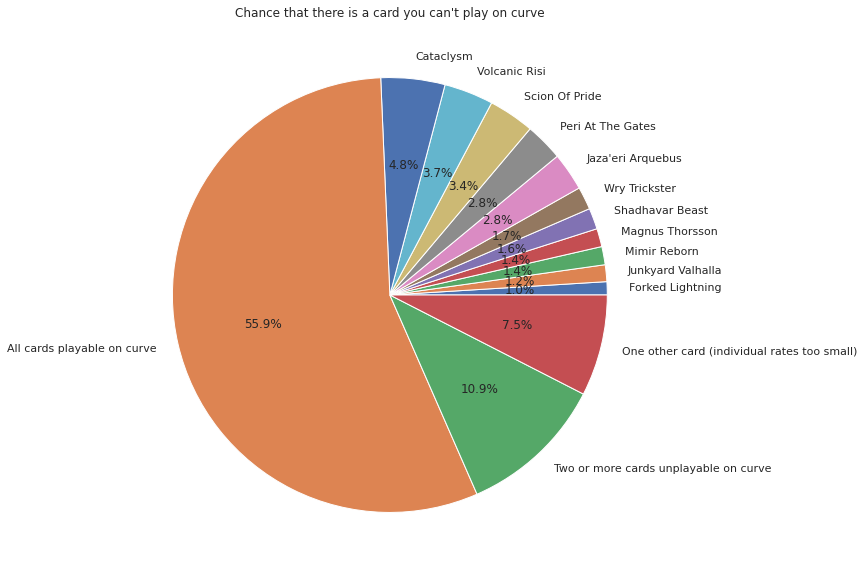

In [25]:
#@title
pieChartData = dataframe[dataframe["percentageOfGamesNegativelyEffected"]>0.025]["percentageOfGamesNegativelyEffected"].sort_values()
temp = (pieChartData/dataframe["percentageOfGamesNegativelyEffected"].sum()*oneUnplayable)
newRow1 = {"All cards playable on curve":allPlayable}
newRow2 = {"Two or more cards unplayable on curve":(1-allPlayable-oneUnplayable)}
newRow3 = {"One other card (individual rates too small)":oneUnplayable*(1-pieChartData.sum()/dataframe["percentageOfGamesNegativelyEffected"].sum())}
pieChartData = temp.append(pd.Series({**newRow1, **newRow2, **newRow3}))
pie = pieChartData.plot.pie(autopct='%1.1f%%',title = 'Chance that there is a card you can\'t play on curve', figsize=(10,10),legend=None)
x=pie.yaxis.set_label_text("")

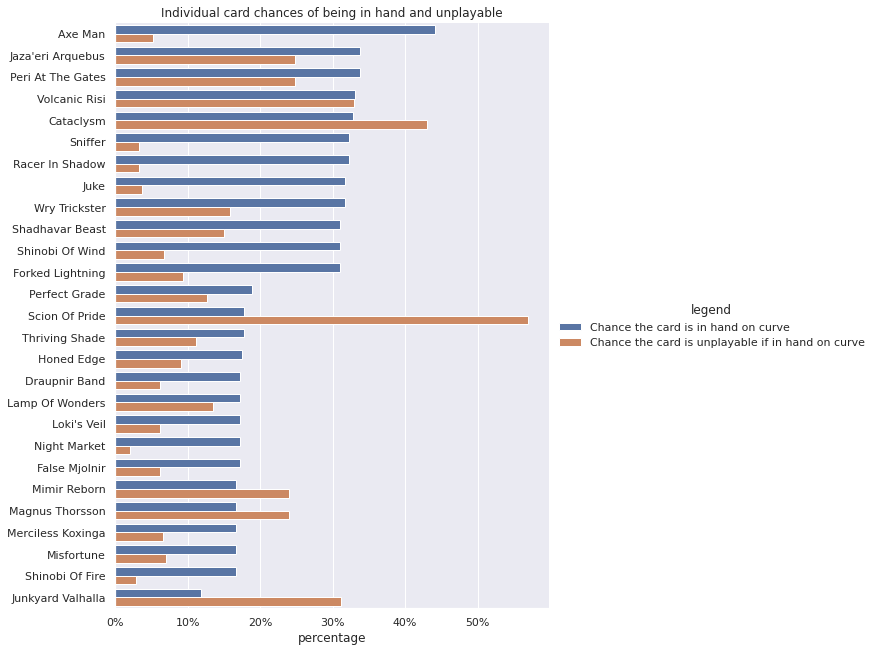

In [26]:
#@title
barChartData = dataframe[dataframe["percentageOfGamesNegativelyEffected"]>0.02]["percentageOfGamesNegativelyEffected"]
temp = (barChartData/barChartData.sum()*oneUnplayable)
newRow1 = {"All cards playable on curve":allPlayable}
newRow2 = {"Two or more cards unplayable on curve":(1-allPlayable-oneUnplayable)}
#df1 = temp.append(pd.Series({**newRow1, **newRow2})).sort_values(ascending=False).to_frame(name = 'percentage')
#df1.rename(columns={"index":"card"},inplace=True)
#df1["name"] = 'Chance that there is a card you can\'t play on curve'
df1 = dataframe["inHandOnCurve"].to_frame(name='percentage')
df1["legend"] = "Chance the card is in hand on curve"
df2 = dataframe["unplayableOnCurve"].to_frame(name='percentage')
df2["legend"] = "Chance the card is unplayable if in hand on curve"
newdf = pd.concat([df1,df2])
newdf.reset_index(inplace=True)
#bar = barChartData.plot.bar(title = 'Chance that there is a card you can\'t play on curve', figsize=(8,8),legend=None)
#x=bar.yaxis.set_label_text("")
sns.set_theme()
x=sns.catplot(  y = "index",       # x variable name
              x = "percentage",       # y variable name
              hue = "legend",  # group variable name
              data = newdf,     # dataframe to plot
              kind = "bar",
              height = 9)
x.set(ylabel=None)
for ax in x.axes.flat:
    ax.set_title("Individual card chances of being in hand and unplayable")
    ax.xaxis.set_major_formatter(PercentFormatter(1))


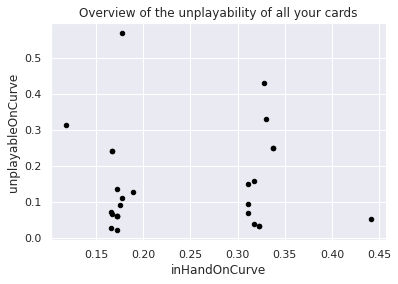

In [27]:
#@title
x=dataframe.plot.scatter(x="inHandOnCurve",y='unplayableOnCurve', c='#000000',title='Overview of the unplayability of all your cards')

I was investigating whether Cataclysm is playable in my three-color deck. The result is that it is unplayable at the 40% level if I also want to play one other blue card before and unplayable at the 70% level if I also want to play two other blue cards before. It is unplayable at the 20% if I don't play any other blue cards.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)